In [2]:
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [5]:
downloaded = set()
sizes = []

for root, dirs, files in os.walk('./downloads'):
    for file in files:
        if file.endswith(".txt"):
            file_path = os.path.join(root, file)
            file_size = os.path.getsize(file_path)
            ident = root.split('/')[-1]
            
            downloaded.add(ident)
            sizes.append((file_size, file_path))
sizevals = set([s[0] for s in sizes])

print(f"Found: {len(downloaded)} total text files downloaded")
print(f"size range: {min(sizevals)} - {max(sizevals)}")

Found: 3972 total text files downloaded
size range: 2323 - 28262520


In [6]:
sizes = sorted(sizes, key=lambda s: s[0])
for s in sizes[:10]:
    print(s)

(2323, './downloads/abcbook0000fall/abcbook0000fall_djvu.txt')
(2719, './downloads/103dcongress1sts0000unse_s.1719/103dcongress1sts0000unse_s.1719_djvu.txt')
(2891, './downloads/ahoytherelittlep00debe/ahoytherelittlep00debe_djvu.txt')
(3111, './downloads/2equatuorpour2vi0000sain/2equatuorpour2vi0000sain_djvu.txt')
(3788, './downloads/45rpmtest00unse/45rpmtest00unse_djvu.txt')
(4733, './downloads/amongmysouvenirs00nich/amongmysouvenirs00nich_djvu.txt')
(5085, './downloads/1963censustest00bost/1963censustest00bost_djvu.txt')
(5708, './downloads/2esymphonie1918p0000milh/2esymphonie1918p0000milh_djvu.txt')
(7904, './downloads/103dcongress1sts0000unse_s.1595/103dcongress1sts0000unse_s.1595_djvu.txt')
(9782, './downloads/21stcenturyjumbo0000aaro/21stcenturyjumbo0000aaro_djvu.txt')


In [20]:
with open('available_books.json') as file:
    full = json.load(file)

available = [item for item in full if item['identifier'] in downloaded]
print(available[:10])
print(len(available))

[{'identifier': '0-89178-034-0', 'creator': 'Saint Louis Art Museum', 'year': 1991, 'title': 'The Saint Louis Art Museum Handbook of the Collections'}, {'identifier': '0-89178-042-4', 'creator': 'Barbara Butts, Joseph Leo Koerner, Betha Whitlow, Pieter Bruegel, Saint Louis Art Museum, Arthur M. Sackler Museum', 'year': 1995, 'title': 'The Printed World of Pieter Bruegel the Elder'}, {'identifier': '0-89178-075-0', 'creator': 'Ann Lane Hedlund, Bill Pearson, Saint Louis Art Museum', 'year': 1997, 'title': 'Navajo Weavings from the Andy Williams Collection'}, {'identifier': '0-89178-080-7', 'creator': 'David H. Conradsen; with a foreword by Patricia E. Kane', 'year': 1999, 'title': 'Useful Beauty: Early American Decorative Arts from St. Louis Collections'}, {'identifier': '0891780239', 'creator': 'Nancy Ward Neilson', 'year': 1977, 'title': 'Five Centuries of Master Graphics in the Collection of the St. Louis Art Museum'}, {'identifier': '0891780432', 'creator': 'Joyce K. Schiller', 'yea

In [21]:
print(available[0].keys())

dict_keys(['identifier', 'creator', 'year', 'title'])


In [35]:
creator_counts = {}
for item in available:
    if 'creator' in item:
        auth = str(item['creator'])
    else:
        auth = 'UNLISTED'
    
    if 'year' in item:
        year = item['year']
    else:
        continue
    
    creator_counts[auth] = creator_counts.get(auth, [])+[year]

In [45]:
auths = sorted(list(creator_counts.keys()), key=lambda a: len(creator_counts[a]), reverse=True)
print(f"Total # of auths: {len(auths)}\n")
for a in auths:
    years = creator_counts[a]
    print(f"{len(years):>3} {min(years)} {max(years)} {a}")
    
    if len(years) < 4:
        break

Total # of auths: 2221

826 1033 2001 UNLISTED
 54 1920 1920 Modern Humanities Research Association
 48 1889 1925 American Historical Association
 45 1895 1895 Smithsonian Institution. Bureau of American Ethnology
 39 1920 1920 American Schools of Oriental Research
 35 1888 1927 various
 34 1879 1879 Free Methodist Church of North America
 32 1922 1922 Carnegie Corporation of New York
 31 1907 1907 Carnegie Hero Fund Commission
 30 1880 1880 Smithsonian Institution. Bureau of Ethnology
 24 1908 1911 American Baptist Convention
 23 1906 1906 Champlain Society
 23 1915 1915 Federal Reserve Bank of New York
 21 1970 1991 United States. Bureau of the Census
 13 1839 1927 Various
 13 1901 1901 Philippine Episcopal Church. Missionary District of the Philippine Islands
 12 1819 1819 Methodist Episcopal Church. Missionary Society
 11 1993 1993 United States. Congress. Senate
 11 1868 1923 joseph whitaker
 11 1891 1992 Twain, Mark, 1835-1910
 11 1925 1926 United Church of Canada. Board of Evang

# Some notes on authors
- It looks like there aren't many authors that are over-represented in the set.

- 20% of the texts don't have an author name.

- We can probably cap authors at 5-10 books and would only truncate major institutions (multiple authors)
    - *Books by multiple authors could make interpretation more complicated?*

- Some of these ranges appear objectively wrong. Look at Mark Twain on the list above. Twain died in 1910, but has books up to 1992 (must be reprints or posthumously published).

- Also note that Twain is split across three author lables ("Twain, Mark 1835-1910", "Mark Twain", "mark twain"). This could possibly skew some authors dramatically.
    - But twain being the only author that appears on this list as dramatically we should probably be fine ignoring this.

total items: 4093


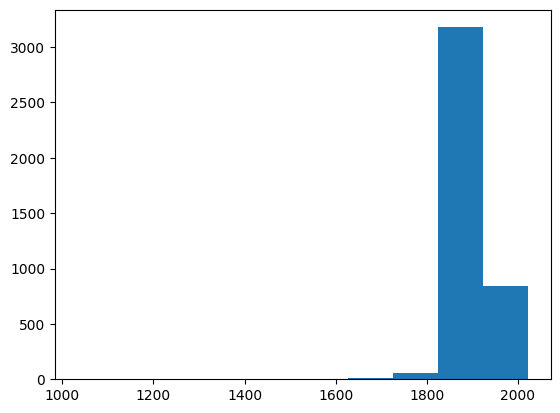

In [67]:
years = []
for item in available:
    if 'year' in item:
        years.append(item['year'])

print(f"total items: {len(years)}")

plt.hist(years)
plt.show()

total items: 4071


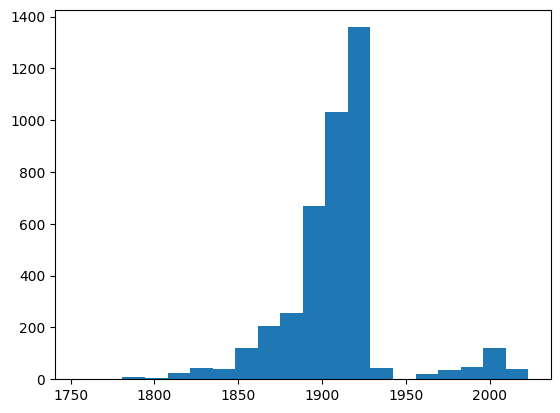

In [68]:
filtered = [x for x in years if x > 1750]
print(f"total items: {len(filtered)}")

plt.hist(filtered, bins=20)
plt.show()